In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots

# Arima model

- ARIMA is a time series forecasting method that combines autoregressive, moving average, and differencing components to predict future values based on past patterns. It's valuable for weather forecasting due to its ability to capture trends and autocorrelation. ARIMA involves model selection, training, and evaluation

Data Preprocess for ARIMA

In [2]:
df = pd.read_csv("data_daily.csv", index_col="Date", parse_dates= True)

In [3]:
# sorted_df = df.sort_values(by=["station_n", "Date"])
# df= sorted_df.head(1450)
AQI_df = df[["AQI_calculated"]]

In [4]:
AQI_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17532 entries, 2013-03-01 to 2017-02-28
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AQI_calculated  17532 non-null  float64
dtypes: float64(1)
memory usage: 273.9 KB


In [5]:
AQI_df

,AQI_calculated
Date,
2013-03-01,76.0
2013-03-01,77.0
2013-03-01,72.0
2013-03-01,82.0
2013-03-01,57.0
...,...
2017-02-28,56.0
2017-02-28,65.0
2017-02-28,42.0


<AxesSubplot: xlabel='Date'>

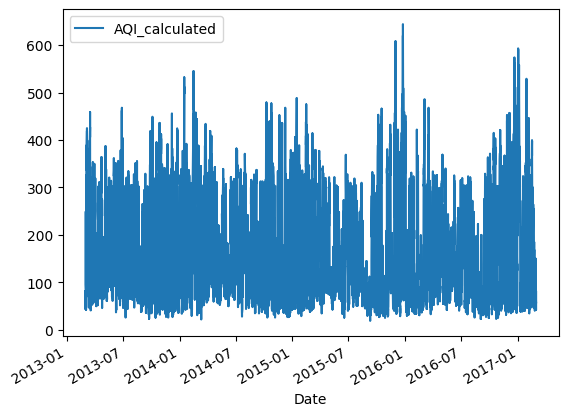

In [6]:
AQI_df.plot()

Splitting the data

In [7]:
train_arima = AQI_df.iloc[:-5000]
test_arima= AQI_df.iloc[-5000:]

ACF plot and PACF plot

- ACF (Auto-Correlation Function) Plot: A plot that shows the correlation between a time series and its lagged values. Helps identify the order of the Moving Average (MA) term in a time series model.
- PACF (Partial Auto-Correlation Function) Plot: A plot that shows the correlation between a time series and its lagged values, excluding the effects of intermediate lags. Helps identify the order of the Auto-Regressive (AR) term in a time series model.

Both plots assist in determining the appropriate orders of AR and MA terms when building time series models like ARIMA or SARIMA.

C:\Users\P14s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


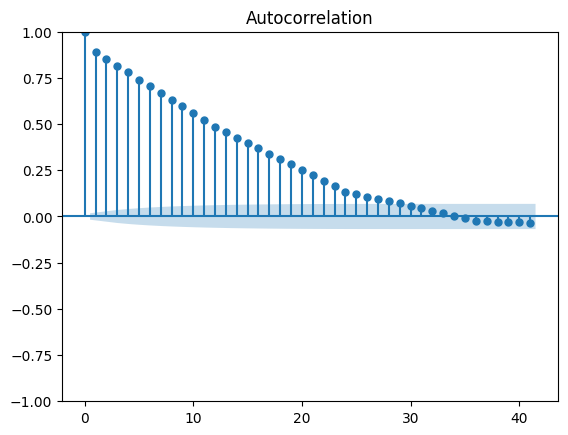

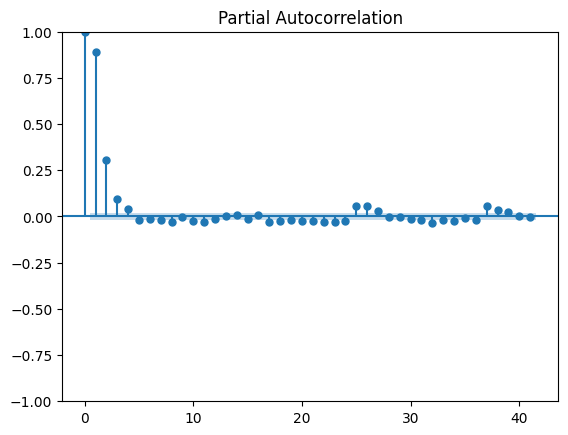

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(train_arima)

pacf_original = plot_pacf(train_arima)

Augmented Dickey-Fuller (ADF) 
- The Augmented Dickey-Fuller (ADF) test is used in ARIMA modeling to check if a time series data is stationary or not
- The test helps decide whether differencing is needed to make the data stationary. If the p-value from the ADF test is low (e.g., below 0.05), the data is likely stationary, and no or less differencing is required (d=0). If the p-value is high, differencing may be needed to achieve stationarity before using ARIMA (d>0)

In [9]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(train_arima)
print(f'p-value: {adf_test[1]}')

p-value: 1.6515809534928084e-26


P- value has number of 1.6515809534928084e-26 or (0.00000000000000000000000016515809534928084), which is considered to be very low

 Traning the Arima model

In [10]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_arima, order=(2, 1, 3))
model_fit= model.fit()
print(model_fit.summary())

C:\Users\P14s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P14s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\P14s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. f

                               SARIMAX Results                                
Dep. Variable:         AQI_calculated   No. Observations:                12532
Model:                 ARIMA(2, 1, 3)   Log Likelihood              -66830.234
Date:                Fri, 11 Aug 2023   AIC                         133672.469
Time:                        13:33:35   BIC                         133717.084
Sample:                             0   HQIC                        133687.403
                              - 12532                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8026      0.011   -167.864      0.000      -1.824      -1.782
ar.L2         -0.9781      0.011    -91.927      0.000      -0.999      -0.957
ma.L1          1.4099      0.012    114.334      0.0

Make predictions on Test set

Residual analysis is a critical step in the process of building and evaluating statistical models, including regression and time series models. It involves examining the differences between the observed values and the predicted values (residuals) generated by the model

density - Kernel Density Estimate (KDE) of the residuals. Kernel Density Estimation is a way to estimate the probability density function of a random variable, which in this case, is the distribution of the residuals from your model.

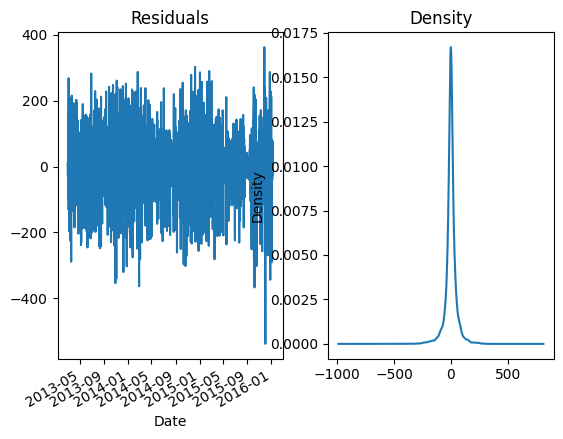

<Figure size 20300x400 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]

fig, ax = plt.subplots(1,2)
plt.figure(figsize=(203, 4))
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

C:\Users\P14s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\P14s\AppData\Local\Temp\ipykernel_8524\212328157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AQI_df['AQI_forecast'] = [None]*len(train_arima) + list(forecast_test)


<AxesSubplot: xlabel='Date'>

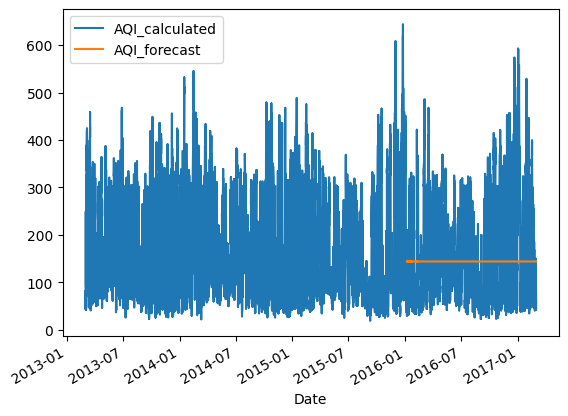

In [12]:
forecast_test = model_fit.forecast(len(test_arima))
AQI_df['AQI_forecast'] = [None]*len(train_arima) + list(forecast_test)

AQI_df.plot()

In [13]:

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(test_arima, forecast_test)
mape = mean_absolute_percentage_error(test_arima, forecast_test)
rmse = np.sqrt(mean_squared_error(test_arima, forecast_test))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 90.04158520359063
mape - manual: 0.8233028791740516
rmse - manual: 112.7327058694817
